In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls

drive  sample_data


In [4]:
import os
os.chdir('drive/MyDrive/AI+X선도인재양성프로젝트/003.지하철 이용승객 EDA분석_숙제_20220914/실습')
%load_ext autoreload
%autoreload 2

In [5]:
!ls

'1.지하철 이용승객 분석 EDA 프로젝트(1).ipynb'
'2호선 역 승차 빈도(합계).html'
'AI+X연습(김정우, 총합(sum)으로 그래프 구함).ipynb'
'AI+X연습(이상치를 평균으로 변환 후 주어진 문제들을 평균으로 구함).ipynb'
'AI+X연습(이상치를 평균으로 변환 후 주어진 문제들을 합계로 구함).ipynb'
'AI+X연습(총합(sum)으로 그래프 구함).ipynb'
'AI+X연습(평균으로 그래프 구함).ipynb'
 rawfiles
 rawfiles.zip
 subway_raw.csv
'subway_raw 데이터 전처리.ipynb'


In [6]:
import sys
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 123620 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [7]:
from matplotlib.font_manager import findSystemFonts
findSystemFonts()

['/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/s

In [8]:
plt.rcParams['font.family'] = 'NanumGothic'

In [9]:
print(plt.rcParams['font.family'], plt.rcParams['font.size'])

['NanumGothic'] 10.0


##subway_raw 데이터 전처리

In [10]:
raw_df = pd.read_csv('rawfiles/CARD_SUBWAY_MONTH_201901.csv')
raw_df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20190101,2호선,을지로4가,3862.0,3728.0,20190104
1,20190101,3호선,을지로3가,8104.0,7554.0,20190104
2,20190101,2호선,을지로입구,22478.0,21330.0,20190104
3,20190101,2호선,시청,8381.0,6049.0,20190104
4,20190101,6호선,동묘앞,8045.0,8504.0,20190104
...,...,...,...,...,...,...
18329,20190131,우이신설경전철,북한산보국문,6195.0,5786.0,20190203
18330,20190131,우이신설경전철,정릉,4600.0,4211.0,20190203
18331,20190131,4호선,성신여대입구,3922.0,4289.0,20190203
18332,20190131,6호선,보문,1659.0,1693.0,20190203


In [11]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18334 entries, 0 to 18333
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사용일자    18334 non-null  int64  
 1   노선명     18334 non-null  object 
 2   역명      18334 non-null  object 
 3   승차총승객수  18334 non-null  float64
 4   하차총승객수  18334 non-null  float64
 5   등록일자    18334 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 859.5+ KB


In [12]:
raw_df = pd.DataFrame()
for month in range(1, 7):
    temp_df = pd.read_csv(f'rawfiles/CARD_SUBWAY_MONTH_20190{month}.csv')
    raw_df = pd.concat([raw_df, temp_df], axis=0)

raw_df = raw_df.reset_index(drop=True)
raw_df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20190101,2호선,을지로4가,3862.0,3728.0,20190104
1,20190101,3호선,을지로3가,8104.0,7554.0,20190104
2,20190101,2호선,을지로입구,22478.0,21330.0,20190104
3,20190101,2호선,시청,8381.0,6049.0,20190104
4,20190101,6호선,동묘앞,8045.0,8504.0,20190104
...,...,...,...,...,...,...
107023,20190630,7호선,마들,6622.0,6116.0,20190703
107024,20190630,4호선,노원,14071.0,14702.0,20190703
107025,20190630,7호선,중계,9516.0,8981.0,20190703
107026,20190630,7호선,하계,11645.0,11121.0,20190703


In [13]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107028 entries, 0 to 107027
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   사용일자    107028 non-null  int64  
 1   노선명     107028 non-null  object 
 2   역명      107028 non-null  object 
 3   승차총승객수  107028 non-null  float64
 4   하차총승객수  107028 non-null  float64
 5   등록일자    107028 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 4.9+ MB


In [14]:
raw_df['사용일자'] = pd.to_datetime(raw_df['사용일자'], format='%Y%m%d')
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107028 entries, 0 to 107027
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   사용일자    107028 non-null  datetime64[ns]
 1   노선명     107028 non-null  object        
 2   역명      107028 non-null  object        
 3   승차총승객수  107028 non-null  float64       
 4   하차총승객수  107028 non-null  float64       
 5   등록일자    107028 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 4.9+ MB


In [15]:
raw_df['요일'] = raw_df['사용일자'].dt.dayofweek
raw_df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
0,2019-01-01,2호선,을지로4가,3862.0,3728.0,20190104,1
1,2019-01-01,3호선,을지로3가,8104.0,7554.0,20190104,1
2,2019-01-01,2호선,을지로입구,22478.0,21330.0,20190104,1
3,2019-01-01,2호선,시청,8381.0,6049.0,20190104,1
4,2019-01-01,6호선,동묘앞,8045.0,8504.0,20190104,1
...,...,...,...,...,...,...,...
107023,2019-06-30,7호선,마들,6622.0,6116.0,20190703,6
107024,2019-06-30,4호선,노원,14071.0,14702.0,20190703,6
107025,2019-06-30,7호선,중계,9516.0,8981.0,20190703,6
107026,2019-06-30,7호선,하계,11645.0,11121.0,20190703,6


In [16]:
day_of_week = {
    0 : '월',
    1 : '화',
    2 : '수',
    3 : '목',
    4 : '금',
    5 : '토',
    6 : '일'
}
raw_df['요일'] = raw_df['요일'].map(day_of_week)

In [17]:
raw_df['연월'] = raw_df['사용일자'].dt.strftime('%Y-%m')
raw_df['월일'] = raw_df['사용일자'].dt.strftime('%m-%d')
raw_df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일,연월,월일
0,2019-01-01,2호선,을지로4가,3862.0,3728.0,20190104,화,2019-01,01-01
1,2019-01-01,3호선,을지로3가,8104.0,7554.0,20190104,화,2019-01,01-01
2,2019-01-01,2호선,을지로입구,22478.0,21330.0,20190104,화,2019-01,01-01
3,2019-01-01,2호선,시청,8381.0,6049.0,20190104,화,2019-01,01-01
4,2019-01-01,6호선,동묘앞,8045.0,8504.0,20190104,화,2019-01,01-01


In [18]:
raw_df['승하차총승객수'] = raw_df['승차총승객수'] + raw_df['하차총승객수']
raw_df = raw_df[['사용일자', '요일', '노선명', '역명', '승차총승객수', '하차총승객수', '승하차총승객수', '연월', '월일', '등록일자' ]]
raw_df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
0,2019-01-01,화,2호선,을지로4가,3862.0,3728.0,7590.0,2019-01,01-01,20190104
1,2019-01-01,화,3호선,을지로3가,8104.0,7554.0,15658.0,2019-01,01-01,20190104
2,2019-01-01,화,2호선,을지로입구,22478.0,21330.0,43808.0,2019-01,01-01,20190104
3,2019-01-01,화,2호선,시청,8381.0,6049.0,14430.0,2019-01,01-01,20190104
4,2019-01-01,화,6호선,동묘앞,8045.0,8504.0,16549.0,2019-01,01-01,20190104


In [19]:
raw_df.isna().sum()

,0
사용일자,0
요일,0
노선명,0
역명,0
승차총승객수,0
하차총승객수,0
승하차총승객수,0
연월,0
월일,0
등록일자,0


In [20]:
raw_df.duplicated(['사용일자','요일', '노선명', '역명', '연월', '월일'], keep=False).sum()

27324

In [21]:
raw_df[(raw_df['사용일자']=='2019-01-01') & (raw_df['역명']=='을지로4가')]

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
0,2019-01-01,화,2호선,을지로4가,3862.0,3728.0,7590.0,2019-01,01-01,20190104
394,2019-01-01,화,2호선,을지로4가,1406.0,1867.0,3273.0,2019-01,01-01,20190104


In [22]:
raw_df[(raw_df['사용일자']=='2019-01-01') & (raw_df['역명']=='서울역')]

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
108,2019-01-01,화,4호선,서울역,5689.0,13266.0,18955.0,2019-01,01-01,20190104
117,2019-01-01,화,4호선,서울역,5983.0,731.0,6714.0,2019-01,01-01,20190104
295,2019-01-01,화,4호선,서울역,39420.0,31121.0,70541.0,2019-01,01-01,20190104
300,2019-01-01,화,4호선,서울역,1278.0,919.0,2197.0,2019-01,01-01,20190104
552,2019-01-01,화,4호선,서울역,14043.0,9955.0,23998.0,2019-01,01-01,20190104


In [23]:
raw_df = raw_df.groupby(['사용일자', '요일','노선명','역명','연월','월일', '등록일자']).sum().reset_index()

In [24]:
raw_df.duplicated(['사용일자','요일', '노선명', '역명', '연월', '월일'], keep=False).sum()

0

In [25]:
raw_df[(raw_df['사용일자']=='2019-01-01') & (raw_df['역명']=='서울역')]

,사용일자,요일,노선명,역명,연월,월일,등록일자,승차총승객수,하차총승객수,승하차총승객수
199,2019-01-01,화,4호선,서울역,2019-01,01-01,20190104,66413.0,55992.0,122405.0


In [26]:
raw_df = raw_df[['사용일자', '요일', '노선명', '역명', '승차총승객수', '하차총승객수', '승하차총승객수', '연월', '월일']]
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92129 entries, 0 to 92128
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   사용일자     92129 non-null  datetime64[ns]
 1   요일       92129 non-null  object        
 2   노선명      92129 non-null  object        
 3   역명       92129 non-null  object        
 4   승차총승객수   92129 non-null  float64       
 5   하차총승객수   92129 non-null  float64       
 6   승하차총승객수  92129 non-null  float64       
 7   연월       92129 non-null  object        
 8   월일       92129 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 6.3+ MB


In [27]:
raw_df.describe()

,사용일자,승차총승객수,하차총승객수,승하차총승객수
count,92129,92129.000000,92129.000000,92129.000000
mean,2019-04-01 00:00:00,14618.749427,14559.237580,29177.987007
min,2019-01-01 00:00:00,16.000000,16.000000,38.000000
25%,2019-02-15 00:00:00,4417.000000,4205.000000,8637.000000
50%,2019-04-01 00:00:00,9543.000000,9280.000000,18870.000000
75%,2019-05-16 00:00:00,18712.000000,18576.000000,37359.000000
max,2019-06-30 00:00:00,143774.000000,167980.000000,311754.000000
std,NaN,16167.904767,16527.224179,32672.526322


In [28]:
raw_df.describe(include='object')

,요일,노선명,역명,연월,월일
count,92129,92129,92129,92129,92129
unique,7,19,509,6,181
top,화,1호선,가능,2019-01,01-01
freq,13234,16109,181,15779,509


In [29]:
df = raw_df.copy()

##2019.01~06 중에 언제 지하철을 가장 많이 이용했을까? (기준: 승하차총승객수)

In [53]:
def replace_outliers_with_mean(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 탐지
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

    # 이상치를 각 그룹의 평균값으로 대체
    mean_value = df[column][(df[column] >= lower_bound) & (df[column] <= upper_bound)].mean()
    df.loc[outliers, column] = mean_value

    return df

In [60]:
passengers_of_day = df[['사용일자','승하차총승객수']].copy()
passengers_of_day['사용일자'] = passengers_of_day['사용일자'].astype(str)
passengers_of_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92129 entries, 0 to 92128
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   사용일자     92129 non-null  object 
 1   승하차총승객수  92129 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


In [61]:
for date, group in passengers_of_day.groupby('사용일자'):
    passengers_of_day.loc[passengers_of_day['사용일자'] == date, '승하차총승객수'] = replace_outliers_with_mean(group, '승하차총승객수')['승하차총승객수']

In [62]:
df[df['사용일자']=='2019-01-01']['승하차총승객수'].std()

16907.35511639118

In [63]:
passengers_of_day[passengers_of_day['사용일자']=='2019-01-01']['승하차총승객수'].std()

6892.76938188861

In [56]:
pd.options.display.float_format = '{:.0f}'.format # pandas는 큰 숫자를 지수 표기법(exponential notation)으로 출력할 때가 있음. 이를 방지하기 위한 코드.
passengers_of_day = passengers_of_day.groupby('사용일자')['승하차총승객수'].mean()
passengers_of_day

,승하차총승객수
사용일자,
2019-01-01,9372
2019-01-02,22718
2019-01-03,23166
2019-01-04,23888
2019-01-05,16890
...,...
2019-06-26,25182
2019-06-27,24567
2019-06-28,25459


In [34]:
passengers_of_day = passengers_of_day.sort_values(ascending=False)
passengers_of_day

,승하차총승객수
사용일자,
2019-05-10,27511
2019-04-11,27075
2019-05-15,27067
2019-05-24,26991
2019-05-28,26871
...,...
2019-02-06,10321
2019-02-03,9647
2019-01-01,9372


In [35]:
passengers_of_day_top10 = passengers_of_day[:10]
passengers_of_day_top10

,승하차총승객수
사용일자,
2019-05-10,27511
2019-04-11,27075
2019-05-15,27067
2019-05-24,26991
2019-05-28,26871
2019-05-03,26844
2019-05-09,26827
2019-05-17,26818
2019-05-08,26776


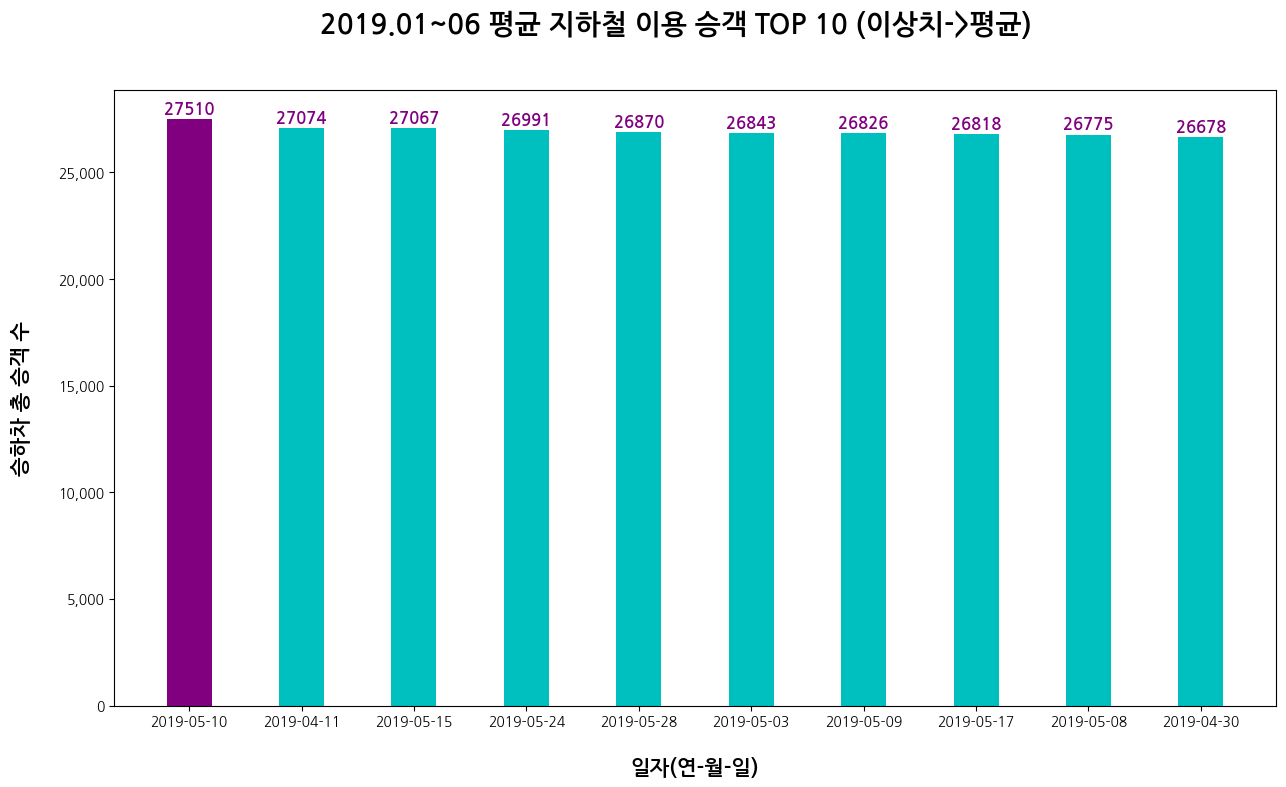

In [64]:
# 기존 숫자의 스케일을 유지하기 위한 모듈 import
import matplotlib.ticker as mtick

# 그래프 색깔을 리스트로 만듬. 최대값은 보라색으로 표현.
color = ['purple','c','c','c','c','c','c','c','c','c']

# fig는 그림 객체, ax는 하위 그래프 객체. figsize는 전체 그림판의 크기(그림판 안에 하위 그래프가 그려짐).
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(passengers_of_day_top10.index, passengers_of_day_top10.values, width=0.4, color=color)  # 막대그래프. 매개변수: (x축, y축, 그래프 폭, 색깔),  x축에 '사용일자'(index)를, y축에 '승하차총승객수(values)'를 놓음.

# 막대 그래프 위의 주석을 표시하기 위한 for문. 첫번째 매개변수는 주석에 표시할 값, 두번째는 그 주석을 놓을 위치. 자세한 내용은 gpt 참조.
for idx, val in passengers_of_day_top10.items():
        plt.annotate(int(val), (idx, val), xytext=(0,4), textcoords='offset points', ha='center', color='purple', fontsize=12, fontweight='bold')

# # 기존 숫자의 단위를 유지하기 위해 작성한 코드. {int(x):,}에서 ','는 천 단위마다 컴마를 추가 하기 위함.
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# x,y축 이름과 그래프 이름.
fig.suptitle('2019.01~06 평균 지하철 이용 승객 TOP 10 (이상치->평균)', fontsize=20, fontweight='bold')
ax.set_xlabel('일자(연-월-일)', fontsize=15, fontweight='bold', labelpad=20)  # labelpad는 그래프와 축 이름의 간격을 설정하는 매개변수.
ax.set_ylabel('승하차 총 승객 수', fontsize=15, fontweight='bold', labelpad=20)

plt.show()

In [66]:
passengers_of_day_top10.idxmax()

'2019-05-10'

##1월~6월중에 5월에 지하철 승객수가 많다? (기준 :승하차총승객수)

In [142]:
def outlier_to_mean(df, month):
    sub_df = df[df['연월']==f'2019-0{month}']['승하차총승객수'].copy()
    Q1 = np.percentile(sub_df, 25)
    Q3 = np.percentile(sub_df, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data_mean = sub_df[(sub_df >= lower_bound) & (sub_df <= upper_bound)].mean()
    sub_df[(sub_df < lower_bound) | (sub_df > upper_bound)] = filtered_data_mean
    return sub_df

In [143]:
passengers_of_month = df[['연월', '월일', '승하차총승객수']].copy()
for i in range(1,7):
    passengers_of_month.loc[passengers_of_month['연월']==f'2019-0{i}','승하차총승객수'] = outlier_to_mean(passengers_of_month, i)

In [144]:
passengers_of_month

,연월,월일,승하차총승객수
0,2019-01,01-01,7105
1,2019-01,01-01,33728
2,2019-01,01-01,6292
3,2019-01,01-01,23151
4,2019-01,01-01,8598
...,...,...,...
92124,2019-06,06-30,6077
92125,2019-06,06-30,5511
92126,2019-06,06-30,4348
92127,2019-06,06-30,10508


In [145]:
passengers_of_month = passengers_of_month.groupby(['연월','월일'])['승하차총승객수'].sum()
passengers_of_month = passengers_of_month.reset_index()
passengers_of_month = passengers_of_month.groupby('연월')['승하차총승객수'].mean()
passengers_of_month

,승하차총승객수
연월,
2019-01,10494219
2019-02,9845739
2019-03,11441399
2019-04,12027132
2019-05,12061782
2019-06,11177907


In [146]:
passengers_of_month.idxmax()

'2019-05'

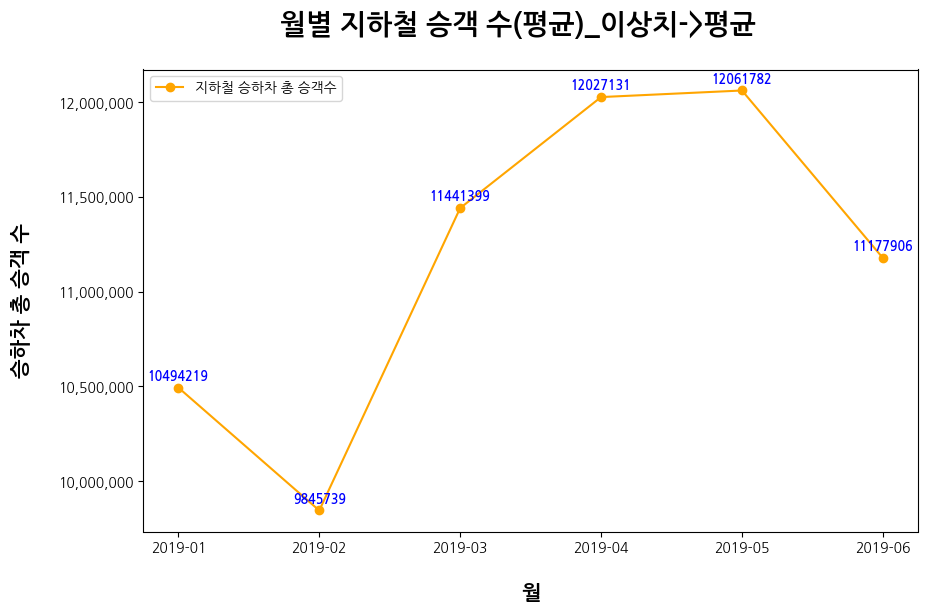

In [147]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(passengers_of_month, marker='o', c='orange', label='지하철 승하차 총 승객수') # 선(plot) 그래프. 첫번째 매개변수로 시리즈 객체 넣어줌(여기서는 passengers_of_month)
                                                                                   # marker는 데이터 값마다 o표시. c는 그래프 색깔, label은 범례 안에 들어갈 이 그래프의 이름.

# 그래프 위에 주석 추가
for idx, val in passengers_of_month.items():
    ax.annotate(int(val), (idx, val), xytext=(0, 6), textcoords='offset points', ha='center',
                fontsize=9, fontweight='bold', color='blue')

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))  # 기존 숫자의 단위를 유지.
ax.legend(loc='upper left') # 범례 추가

# x,y축 이름과 그래프 이름.
fig.suptitle('월별 지하철 승객 수(평균)_이상치->평균', fontsize=20, fontweight='bold')
ax.set_xlabel('월', fontsize=15, fontweight='bold', labelpad=20)
ax.set_ylabel('승하차 총 승객 수', fontsize=15, fontweight='bold', labelpad=20)

plt.show()

##요일중에서 목요일에 지하철 승객수가 많다? (기준 :승하차총승객수)

In [74]:
df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
0,2019-01-01,화,1호선,가능,3650,3455,7105,2019-01,01-01
1,2019-01-01,화,1호선,가산디지털단지,16504,17224,33728,2019-01,01-01
2,2019-01-01,화,1호선,간석,3092,3200,6292,2019-01,01-01
3,2019-01-01,화,1호선,개봉,11366,11785,23151,2019-01,01-01
4,2019-01-01,화,1호선,관악,4410,4188,8598,2019-01,01-01


In [80]:
def outlier_to_mean(df, day):
    sub_df = df[df['요일']==f'{day}']['승하차총승객수'].copy()
    Q1 = np.percentile(sub_df, 25)
    Q3 = np.percentile(sub_df, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data_mean = sub_df[(sub_df >= lower_bound) & (sub_df <= upper_bound)].mean()
    sub_df[(sub_df < lower_bound) | (sub_df > upper_bound)] = filtered_data_mean
    return sub_df

In [81]:
df_week = df[['월일','요일', '승하차총승객수']]
days = ['월', '화', '수', '목', '금', '토', '일']
for day in days:
    df_week.loc[df_week['요일']==f'{day}','승하차총승객수'] = outlier_to_mean(df_week, day)

In [82]:
df_week = df_week.groupby(['월일','요일'])['승하차총승객수'].sum()
df_week = df_week.reset_index()
df_week = df_week.groupby(['요일'])['승하차총승객수'].mean()
df_week = df_week.reindex(['월', '화', '수', '목', '금', '토', '일'])
df_week

,승하차총승객수
요일,
월,12117747
화,12306494
수,12541965
목,12667600
금,12880999
토,9485981
일,7026929


In [83]:
print(f"<<<평균적으로>>> 가장 많은 승객들이 지하철을 이용하는 요일: {df_week.idxmax()}(평균 이용승객 수: {int(df_week.max())})")

<<<평균적으로>>> 가장 많은 승객들이 지하철을 이용하는 요일: 금(평균 이용승객 수: 12880999)


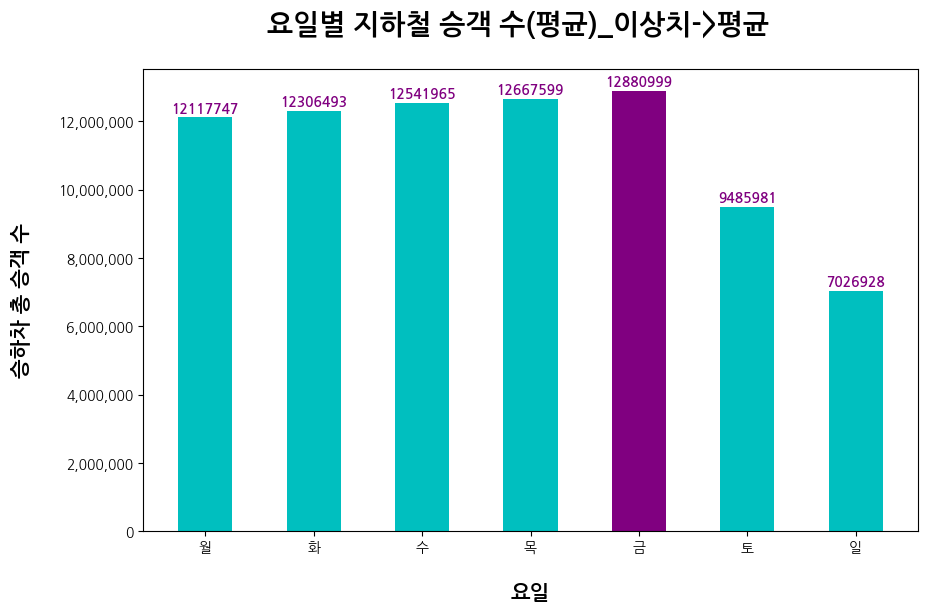

In [84]:
colors = ['c','c','c','c','purple','c','c'] # 그래프 색상 리스트

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_week.index, df_week.values, color=colors, width=0.5) # 막대 그래프. x축: '요일'   y축: '승하차총승객수'

# 막대 그래프 위에 주석 추가.
for idx, val in df_week.items():
    plt.annotate(int(val), (idx, val), xytext=(0,4),
                 textcoords='offset points', ha='center', color='purple',fontsize=10, fontweight='bold')

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))  # 기존 숫자의 단위를 유지.

fig.suptitle('요일별 지하철 승객 수(평균)_이상치->평균', fontsize=20, fontweight='bold')
ax.set_xlabel('요일', fontsize=15, fontweight='bold', labelpad=20)
ax.set_ylabel('승하차 총 승객 수', fontsize=15, fontweight='bold', labelpad=20)

plt.show()

##일자별(월일별) 승하차승객수 그래프 그려 볼까요? (기준 :승하차총승객수)

In [85]:
df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
0,2019-01-01,화,1호선,가능,3650,3455,7105,2019-01,01-01
1,2019-01-01,화,1호선,가산디지털단지,16504,17224,33728,2019-01,01-01
2,2019-01-01,화,1호선,간석,3092,3200,6292,2019-01,01-01
3,2019-01-01,화,1호선,개봉,11366,11785,23151,2019-01,01-01
4,2019-01-01,화,1호선,관악,4410,4188,8598,2019-01,01-01


In [86]:
def outlier_to_mean(df, month_day):
    sub_df = df[df['월일']==f'{month_day}']['승하차총승객수'].copy()
    Q1 = np.percentile(sub_df, 25)
    Q3 = np.percentile(sub_df, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data_mean = sub_df[(sub_df >= lower_bound) & (sub_df <= upper_bound)].mean()
    sub_df[(sub_df < lower_bound) | (sub_df > upper_bound)] = filtered_data_mean
    return sub_df

In [87]:
df_MD = df[['월일', '승하차총승객수']]
months_days = df_MD['월일'].unique()
for month_day in months_days:
    df_MD.loc[df_MD['월일']==f'{month_day}','승하차총승객수'] = outlier_to_mean(df_MD, month_day)

In [88]:
df_MD = df_MD.groupby(['월일'])['승하차총승객수'].mean()
df_MD

,승하차총승객수
월일,
01-01,9372
01-02,22718
01-03,23166
01-04,23888
01-05,16890
...,...
06-26,25182
06-27,24567
06-28,25459


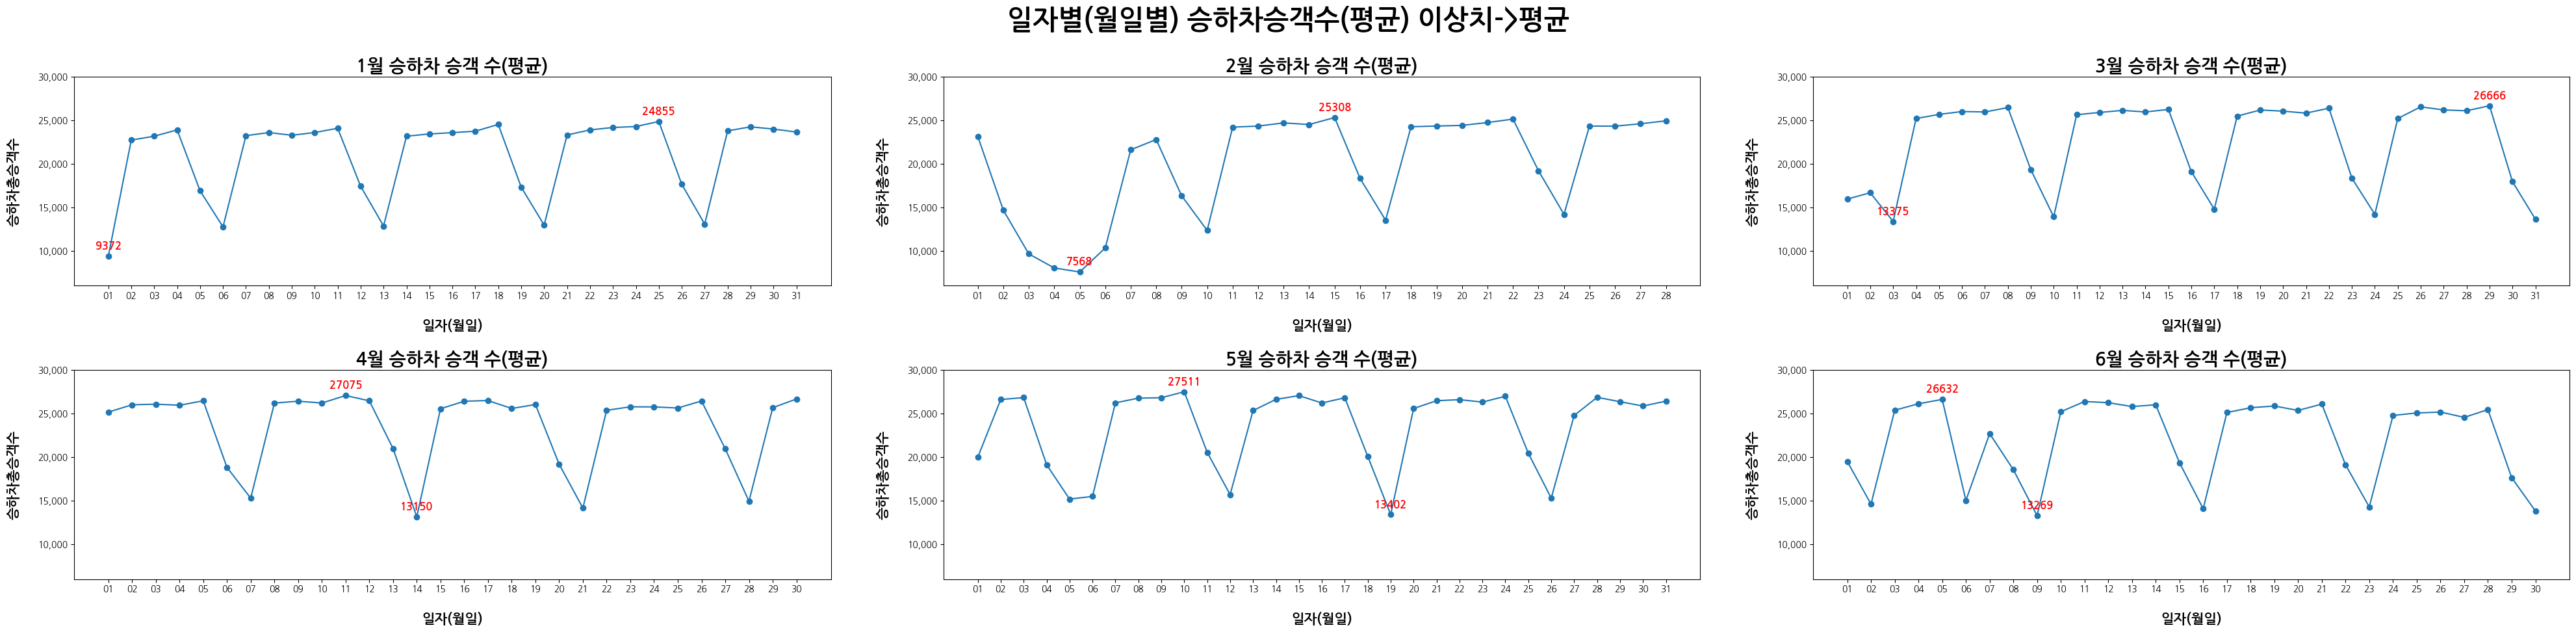

In [96]:
month = 1 # 1월부터 시작.

fig, axes = plt.subplots(2, 3, figsize=(40, 10)) # 2x3 행렬, figure 객체(그림객체) 크기는 가로40, 세로10.
for r in range(2): # 행(row)
    for c in range(3): # 열(column)

        df_M = df_MD[df_MD.index.str.startswith(f'0{month}')]  # df_MD의 인덱스(월일)가 f'0{month}'로 시작하는 것들만 저장.   ex. month = 1 이면 01로 시작하는 모든 data를 저장(즉, 1월 data만 저장)
        day_list = df_M.index.str.split('-') # '-'를 기준으로 인덱스를 나눔. ex. 01-02 -> ['01', '02'] 이것을 1월의 모든 행에 적용하면 day_list = [['01', '01'], ['01', '02'], .....['01', '31']] 이 생성됨.
        day_list = day_list.str.get(1) # 그중 첫번째 인덱스의 값을 모두 가져옴. -> ['01', '02', ... '31'] <<<이해가 되지 않는다면 아래의 셀의 코드를 실행.>>>
        axes[r,c].plot(day_list, df_M.values, marker='o') # x축은 날짜(일), y축은 '승하차총승객수'
        df_M_max = df_M.max()
        df_M_min = df_M.min()

        # 월별로 최대값, 최소값인 지점만 주석 표시.
        for idx, val in zip(day_list[:], df_M[:].values):
            if(val == df_M_max): # 최대값 주석 표시
                axes[r,c].annotate(round(val), (idx, val), xytext=(0, 8), textcoords='offset points', fontsize=12, ha='center', color='red', fontweight='bold')
            elif(val == df_M_min): # 최소값 주석 표시
                axes[r,c].annotate(round(val), (idx, val), xytext=(0, 8), textcoords='offset points', fontsize=12, ha='center', color='red', fontweight='bold')

        axes[r,c].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))  # 기존 숫자의 단위를 유지.
        axes[r,c].set_ylim(6000, 30000) # y축의 범위 설정.

        # x,y축 이름 및 각각의 그래프 이름
        axes[r,c].set_xlabel('일자(월일)', fontsize=15, fontweight='bold', labelpad=20)
        axes[r,c].set_ylabel('승하차총승객수', fontsize=15, fontweight='bold', labelpad=20)
        axes[r,c].set_title(f'{month}월 승하차 승객 수(평균)', fontsize=20, fontweight='bold')

        month += 1 # month 1증가

fig.suptitle('일자별(월일별) 승하차승객수(평균) 이상치->평균', fontsize=30, fontweight='bold')  # 전체 제목.
fig.set_layout_engine('tight', pad=2.0, h_pad=2.0, w_pad=5.0) # 그래프를 좀더 보기 편하게 하기 위한 부가적인 설정. gpt 검색 해봐도 됨.
plt.show()

##가장 승객이 많이 타는 승차역은?

In [97]:
df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
0,2019-01-01,화,1호선,가능,3650,3455,7105,2019-01,01-01
1,2019-01-01,화,1호선,가산디지털단지,16504,17224,33728,2019-01,01-01
2,2019-01-01,화,1호선,간석,3092,3200,6292,2019-01,01-01
3,2019-01-01,화,1호선,개봉,11366,11785,23151,2019-01,01-01
4,2019-01-01,화,1호선,관악,4410,4188,8598,2019-01,01-01


In [98]:
def outlier_to_mean(df, station):
    sub_df = df[df['역명']==f'{station}']['승차총승객수'].copy()
    Q1 = np.percentile(sub_df, 25)
    Q3 = np.percentile(sub_df, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data_mean = sub_df[(sub_df >= lower_bound) & (sub_df <= upper_bound)].mean()
    sub_df[(sub_df < lower_bound) | (sub_df > upper_bound)] = filtered_data_mean
    return sub_df

In [99]:
df_stations = df[['역명', '승차총승객수']]
stations = df_stations['역명'].unique()
for station in stations:
    df_stations.loc[df_stations['역명']==f'{station}','승차총승객수'] = outlier_to_mean(df_stations, station)

In [100]:
df_stations = df_stations.groupby(['역명'])['승차총승객수'].mean()
df_stations

,승차총승객수
역명,
4.19민주묘지,3279
가능,7353
가락시장,17938
가산디지털단지,55864
가양,20876
...,...
회기,30371
회룡,13561
회현,34392


In [101]:
df_stations.sort_values(ascending=False)

,승차총승객수
역명,
잠실,106453
강남,102164
고속터미널,97437
서울역,97068
홍대입구,96006
...,...
신원,230
백양리,187
굴봉산,167


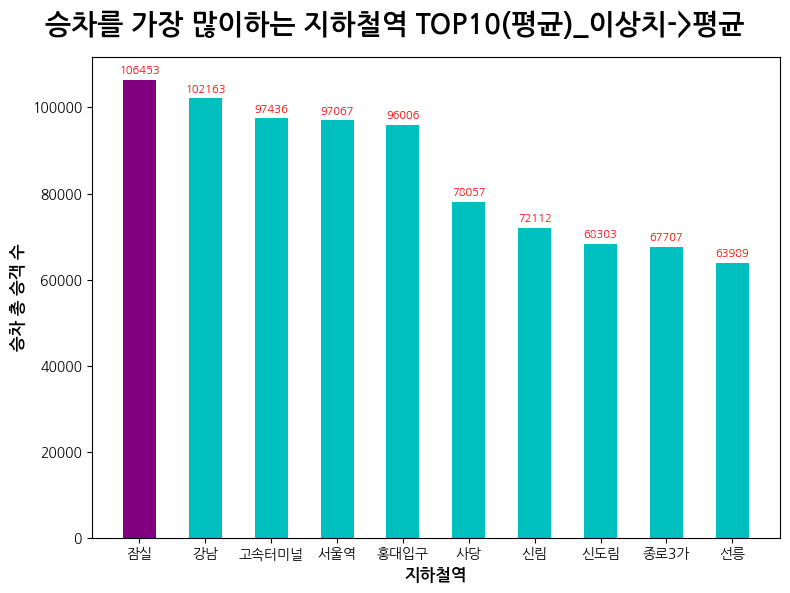

In [102]:
colors = ['purple','c','c','c','c','c','c','c','c','c']
station_top10 = df_stations.sort_values(ascending=False).head(10)
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(station_top10.index, station_top10.values, width=0.5, color=colors)
for idx, val in station_top10.items():
    ax.annotate(int(val), (idx, val), xytext=(0,4), textcoords='offset points', fontsize=8, ha='center', color='red')
ax.set_xlabel('지하철역', fontsize=12, fontweight='bold')
ax.set_ylabel('승차 총 승객 수', fontsize=12, fontweight='bold')
fig.suptitle('승차를 가장 많이하는 지하철역 TOP10(평균)_이상치->평균', fontsize=20, fontweight='bold')
fig.set_layout_engine('tight')
plt.show()

In [103]:
print(f'평균적으로 승차를 가장 많이하는 지하철역: {df_stations.idxmax()} || 승차 승객 수: {int(df_stations.max())}')

평균적으로 승차를 가장 많이하는 지하철역: 잠실 || 승차 승객 수: 106453


##노선별로 역별/요일별 승차승객수를 비교해 볼수 있을까? (1~9호선, 역별/요일별 heatmap)

In [104]:
df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
0,2019-01-01,화,1호선,가능,3650,3455,7105,2019-01,01-01
1,2019-01-01,화,1호선,가산디지털단지,16504,17224,33728,2019-01,01-01
2,2019-01-01,화,1호선,간석,3092,3200,6292,2019-01,01-01
3,2019-01-01,화,1호선,개봉,11366,11785,23151,2019-01,01-01
4,2019-01-01,화,1호선,관악,4410,4188,8598,2019-01,01-01


In [105]:
fig, axes = plt.subplots(3, 3, figsize=(50, 60))

line_number = 1

for r in range(3):
    for c in range(3):
        df_line = df[df['노선명']==f'{line_number}호선']
        df_line = df_line.groupby(['역명', '요일'])['승차총승객수'].mean()
        df_line = df_line.reset_index()
        df_line = df_line.pivot_table(index='역명', columns='요일', values='승차총승객수')
        df_line = df_line[['월', '화', '수', '목', '금', '토', '일']]
        df_line = df_line.astype('int')
        sns.heatmap(df_line, linewidths=0.5, cmap='Blues', annot=True, fmt='d', ax=axes[r,c])
        axes[r,c].set_title(f'{line_number}호선 역별/요일별 승차승객수(평균)', fontsize=20, fontweight='bold')
        axes[r,c].set_xlabel(f'요일', fontsize=20, fontweight='bold')
        axes[r,c].set_ylabel(f'{line_number}호선 역명', fontsize=20, fontweight='bold')
        line_number += 1

fig.set_layout_engine('tight', pad=5.0, h_pad=5.0, w_pad=5.0)
fig.suptitle('지하철 역별/요일별 승차승객수(평균)', fontsize=30, fontweight='bold')
plt.plot()

Output hidden; open in https://colab.research.google.com to view.

##1호선에서 가장 하차를 많이 하는 역은? (groupby)

In [106]:
df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
0,2019-01-01,화,1호선,가능,3650,3455,7105,2019-01,01-01
1,2019-01-01,화,1호선,가산디지털단지,16504,17224,33728,2019-01,01-01
2,2019-01-01,화,1호선,간석,3092,3200,6292,2019-01,01-01
3,2019-01-01,화,1호선,개봉,11366,11785,23151,2019-01,01-01
4,2019-01-01,화,1호선,관악,4410,4188,8598,2019-01,01-01


In [107]:
def outlier_to_mean(df, station):
    sub_df = df[df['역명']==f'{station}']['하차총승객수'].copy()
    Q1 = np.percentile(sub_df, 25)
    Q3 = np.percentile(sub_df, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data_mean = sub_df[(sub_df >= lower_bound) & (sub_df <= upper_bound)].mean()
    sub_df[(sub_df < lower_bound) | (sub_df > upper_bound)] = filtered_data_mean
    return sub_df

In [108]:
df_line1 = df[df['노선명']=='1호선']
line1_stations = df_line1['역명'].unique()
for station in line1_stations:
    df_line1.loc[df_line1['역명']==f'{station}','하차총승객수'] = outlier_to_mean(df_line1, station)

In [109]:
df_line1 = df_line1.groupby(['역명'])['하차총승객수'].mean()

In [110]:
df_line1

,하차총승객수
역명,
가능,6837
가산디지털단지,58405
간석,6341
개봉,24740
관악,8427
...,...
천안,7260
평택,14345
화서,8398


In [112]:
df_line1 = df_line1.sort_values(ascending=False)
df_line1

,하차총승객수
역명,
가산디지털단지,58405
수원,56815
영등포,52476
노량진,44628
부평,43393
...,...
서동탄,1652
진위,1499
봉명,1319


In [113]:
line1_station_top10 = df_line1[:10]

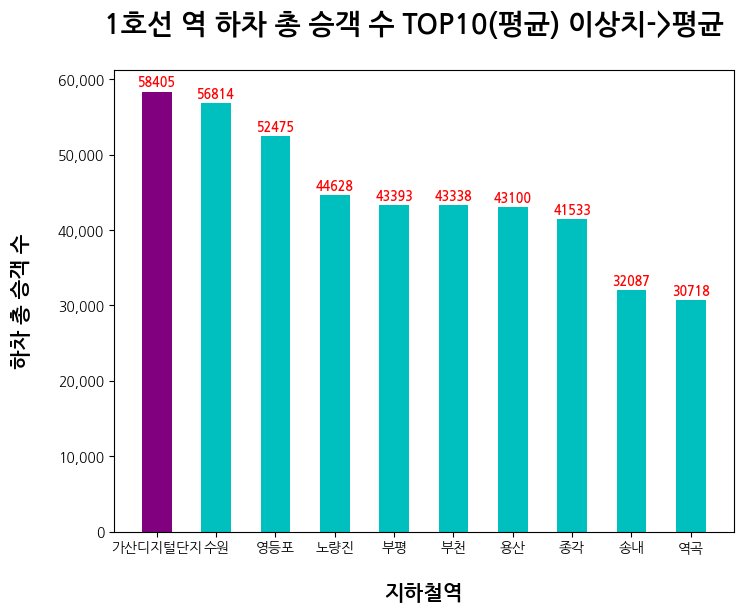

In [114]:
colors = ['purple','c','c','c','c','c','c','c','c','c']

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(line1_station_top10.index, line1_station_top10.values, width=0.5, color=colors)

# 막대 그래프 위 주석 표시
for idx, val in df_line1.items():
    ax.annotate(int(val), (idx, val), xytext=(0,4), textcoords='offset points',
                fontsize=9, fontweight='bold', ha='center', color='red')

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))  # 기존 숫자의 단위를 유지.

ax.set_xlabel('지하철역', fontsize=15, fontweight='bold', labelpad=20)
ax.set_ylabel('하차 총 승객 수', fontsize=15, fontweight='bold', labelpad=20)
fig.suptitle('1호선 역 하차 총 승객 수 TOP10(평균) 이상치->평균', fontsize=20, fontweight='bold')

plt.show()

In [115]:
print(f'평균적으로 1호선에서 하차를 가장 많이하는 지하철역: {df_line1.idxmax()} || 하차 승객 수: {int(df_line1.max())}')

평균적으로 1호선에서 하차를 가장 많이하는 지하철역: 가산디지털단지 || 하차 승객 수: 58405


##2호선중에서 어느 역에서 승차가 가장 많이 발생할까? (Folium 역 표시)

In [116]:
subway_location_df = pd.read_csv('rawfiles/지하철노선위경도정보2.csv')
subway_location_df.head()

,역이름,역지역,위도,경도,호선
0,낙성대,수도권,37,127,2호선
1,구룡,수도권,37,127,분당선
2,서울대입구,수도권,37,127,2호선
3,불광,수도권,38,127,3호선
4,월롱,수도권,38,127,경의선


In [132]:
subway_lon_lat_df = df.merge(subway_location_df, left_on=['역명', '노선명'], right_on=['역이름', '호선'])
subway_lon_lat_df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,역이름,역지역,위도,경도,호선
0,2019-01-01,화,1호선,가능,3650,3455,7105,2019-01,01-01,가능,수도권,38,127,1호선
1,2019-01-01,화,1호선,가산디지털단지,16504,17224,33728,2019-01,01-01,가산디지털단지,수도권,37,127,1호선
2,2019-01-01,화,1호선,간석,3092,3200,6292,2019-01,01-01,간석,수도권,37,127,1호선
3,2019-01-01,화,1호선,개봉,11366,11785,23151,2019-01,01-01,개봉,수도권,37,127,1호선
4,2019-01-01,화,1호선,관악,4410,4188,8598,2019-01,01-01,관악,수도권,37,127,1호선


In [133]:
line2_info = subway_lon_lat_df[subway_lon_lat_df['노선명']=='2호선']
line2_info.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,역이름,역지역,위도,경도,호선
89,2019-01-01,화,2호선,강남,38729,36544,75273,2019-01,01-01,강남,수도권,37,127,2호선
90,2019-01-01,화,2호선,강변,29375,27265,56640,2019-01,01-01,강변,수도권,38,127,2호선
91,2019-01-01,화,2호선,건대입구,38542,39275,77817,2019-01,01-01,건대입구,수도권,38,127,2호선
92,2019-01-01,화,2호선,교대,12027,11552,23579,2019-01,01-01,교대,수도권,37,127,2호선
93,2019-01-01,화,2호선,구로디지털단지,24511,25162,49673,2019-01,01-01,구로디지털단지,수도권,37,127,2호선


In [134]:
line2_lon_lat = line2_info[['사용일자', '역이름', '역지역', '위도', '경도', '호선', '승차총승객수']]
line2_lon_lat.head()

,사용일자,역이름,역지역,위도,경도,호선,승차총승객수
89,2019-01-01,강남,수도권,37,127,2호선,38729
90,2019-01-01,강변,수도권,38,127,2호선,29375
91,2019-01-01,건대입구,수도권,38,127,2호선,38542
92,2019-01-01,교대,수도권,37,127,2호선,12027
93,2019-01-01,구로디지털단지,수도권,37,127,2호선,24511


In [135]:
def outlier_to_mean(df, station):
    sub_df = df[df['역이름']==f'{station}']['승차총승객수'].copy()
    Q1 = np.percentile(sub_df, 25)
    Q3 = np.percentile(sub_df, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data_mean = sub_df[(sub_df >= lower_bound) & (sub_df <= upper_bound)].mean()
    sub_df[(sub_df < lower_bound) | (sub_df > upper_bound)] = filtered_data_mean
    return sub_df

In [136]:
line2_stations = line2_lon_lat['역이름'].unique()
for station in line2_stations:
    line2_lon_lat.loc[line2_lon_lat['역이름']==f'{station}','승차총승객수'] = outlier_to_mean(line2_lon_lat, station)

In [138]:
line2_lon_lat = line2_lon_lat.groupby(['역이름', '역지역', '위도', '경도', '호선'])['승차총승객수'].mean()
line2_lon_lat = line2_lon_lat.reset_index().sort_values(by='승차총승객수', ascending=False)
line2_lon_lat.head()

,역이름,역지역,위도,경도,호선,승차총승객수
39,잠실,수도권,38,127,2호선,106453
0,강남,수도권,37,127,2호선,102164
46,홍대입구,수도권,38,127,2호선,96006
15,사당,수도권,37,127,2호선,78058
27,신림,수도권,37,127,2호선,72112


In [125]:
line2_lon_lat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 39 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   역이름     47 non-null     object 
 1   역지역     47 non-null     object 
 2   위도      47 non-null     float64
 3   경도      47 non-null     float64
 4   호선      47 non-null     object 
 5   승차총승객수  47 non-null     float64
dtypes: float64(3), object(3)
memory usage: 2.6+ KB


In [139]:
!pip install folium

In [140]:
import folium
from folium.plugins import HeatMap

max_value = line2_lon_lat['승차총승객수'].max()

m = folium.Map(location=[37.5350, 126.9780], zoom_start=12)

for idx, row in line2_lon_lat.iterrows():
    if row['승차총승객수'] == max_value:
        folium.Marker([row['위도'], row['경도']], popup=f"승차 총 승객 수 {int(row['승차총승객수'])}",
                  tooltip=row['역이름'] ,icon=folium.Icon(icon='star', color='orange')).add_to(m)
    else:
        folium.Marker([row['위도'], row['경도']], popup=f"승차 총 승객 수 {int(row['승차총승객수'])}",
                    tooltip=row['역이름'] ,icon=folium.Icon(icon='star')).add_to(m)

HeatMap(line2_lon_lat[['위도', '경도', '승차총승객수']], radius=25, min_opacity=0.7).add_to(m)

m